# <center>Lung Cancer treatment demo</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introdution" data-toc-modified-id="Introdution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introdution</a></span></li><li><span><a href="#2D-Processing-1-Img" data-toc-modified-id="2D-Processing-1-Img-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2D Processing 1 Img</a></span></li><li><span><a href="#3D-https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial" data-toc-modified-id="3D-https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D <a href="https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial" target="_blank">https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial</a></a></span></li><li><span><a href="#Segmentation-of-Lungs" data-toc-modified-id="Segmentation-of-Lungs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Segmentation of Lungs</a></span></li><li><span><a href="#Dice-Ceofficient-Cost-function-for-Segmentation" data-toc-modified-id="Dice-Ceofficient-Cost-function-for-Segmentation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dice Ceofficient Cost function for Segmentation</a></span></li><li><span><a href="#UNET-for-Candidate-Point-Generation" data-toc-modified-id="UNET-for-Candidate-Point-Generation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>UNET for Candidate Point Generation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introdution

Use Deep Learning and LUNA16 to determine if the patient will be diagnosed with lung cancer.

1. Pre-process the image data
2. Perform data exploration to learn as much about the data (include visualization in 2D, 3D, segmentation)
3. Segmentation with Unet

In [6]:
!python -m pip install SimpleITK
%matplotlib inline
import SimpleITK as sitk
import numpy as np
import csv
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tq
from PIL import Image

     |████████████████████████████████| 42.5MB 71kB/s 


In [7]:
cd ..


/content


In [8]:
ls

Data/  sample_data/


In [9]:
data_path = "Data"
joinPath = os.path.join
print(joinPath(data_path,"*.mhd"))
file_list = glob(joinPath(data_path,"*.mhd"))
print(len(file_list))
print(file_list)
# Helper function to get rows in data frame associated 
# with each file
def get_filename(case):
    global file_list
    for f in file_list:
        if case in f:
            return(f)

Data/*.mhd
89
['Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.144438612068946916340281098509.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.564534197011295112247542153557.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.332453873575389860371315979768.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.313835996725364342034830119490.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.303421828981831854739626597495.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.188376349804761988217597754952.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.305858704835252413616501469037.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.417815314896088956784723476543.mhd', 'Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.219087313261026510628

In [0]:
mkdir labels

In [53]:
cd labels

/content/labels


In [54]:
!wget https://zenodo.org/record/2604219/files/annotations.csv?download=1

--2020-01-05 09:25:52--  https://zenodo.org/record/2604219/files/annotations.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136986 (134K) [text/plain]
Saving to: ‘annotations.csv?download=1’

annotations.csv?dow 100%[===================>] 133.78K   377KB/s    in 0.4s    

2020-01-05 09:25:53 (377 KB/s) - ‘annotations.csv?download=1’ saved [136986/136986]



In [0]:
mv annotations.csv?download=1 annotations.csv

In [12]:
!wget https://zenodo.org/record/2604219/files/candidates.csv?download=1

--2020-01-05 09:00:06--  https://zenodo.org/record/2604219/files/candidates.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55427881 (53M) [text/plain]
Saving to: ‘candidates.csv?download=1’

candidates.csv?down 100%[===================>]  52.86M  18.0MB/s    in 2.9s    

2020-01-05 09:00:10 (18.0 MB/s) - ‘candidates.csv?download=1’ saved [55427881/55427881]



In [0]:
mv candidates.csv?download=1 candidates.csv

In [14]:
cd ..


/content


In [15]:
ls labels

candidates.csv


In [16]:
labels_path = 'labels'
# The locations of the nodes
df_node = pd.read_csv(joinPath(labels_path,"candidates.csv"))
df_node["file"] = df_node["seriesuid"].apply(get_filename)
df_node = df_node.dropna()
df_node.head(5)

,seriesuid,coordX,coordY,coordZ,class,file
9310,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,129.568151,45.377097,-277.835758,0,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1057566...
9311,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-97.260000,56.360000,-201.930000,0,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1057566...
9312,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,99.230491,-4.882165,-128.691305,0,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1057566...
9313,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-15.287525,-59.105100,-251.303750,0,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1057566...
9314,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,109.344666,1.891737,-237.284699,0,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1057566...


In [17]:
df_node.shape

(56938, 6)

In [0]:
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, 
origin and spacing of the image.
'''
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)
    
    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)
    
    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))
    
    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return ct_scan, origin, spacing

In [0]:
'''
This function is used to convert the world coordinates to voxel coordinates using 
the origin and spacing of the ct_scan
'''
def world_2_voxel(world_coordinates, origin, spacing):
    stretched_voxel_coordinates = np.absolute(world_coordinates - origin)
    voxel_coordinates = stretched_voxel_coordinates / spacing
    return voxel_coordinates

In [0]:
'''
This function is used to convert the voxel coordinates to world coordinates using 
the origin and spacing of the ct_scan.
'''
def voxel_2_world(voxel_coordinates, origin, spacing):
    stretched_voxel_coordinates = voxel_coordinates * spacing
    world_coordinates = stretched_voxel_coordinates + origin
    return world_coordinates

We want to extract now some features from the candidates. We define some normalized planes to extract views from the candidates

In [0]:
def normalizePlanes(npzarray):
     
    maxHU = 400.
    minHU = -1000.
 
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray>1] = 1.
    npzarray[npzarray<0] = 0.
    return npzarray

## 2D Processing 1 Img

In [0]:
ct_scan, origin, spacing = load_itk(file_list[0])

In [23]:
ct_scan.shape

(157, 512, 512)

In [24]:
origin

array([-312.934998, -154.399994, -146.600006])

In [25]:
spacing

array([2.        , 0.66406202, 0.66406202])

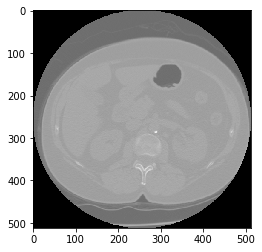

In [26]:
plt.imshow(ct_scan[0], cmap=plt.cm.gray)

plot 20 first slices of an image

In [0]:
def plot_ct_scan(scanImg):
    f, plots = plt.subplots(  5, 4, figsize=(25, 25))
    for i in range(0, 20, 1):
        plots[int(i%5), int(i/5)].axis('off')
        plots[int(i%5), int(i/5)].imshow(scanImg[0], cmap=plt.cm.gray)

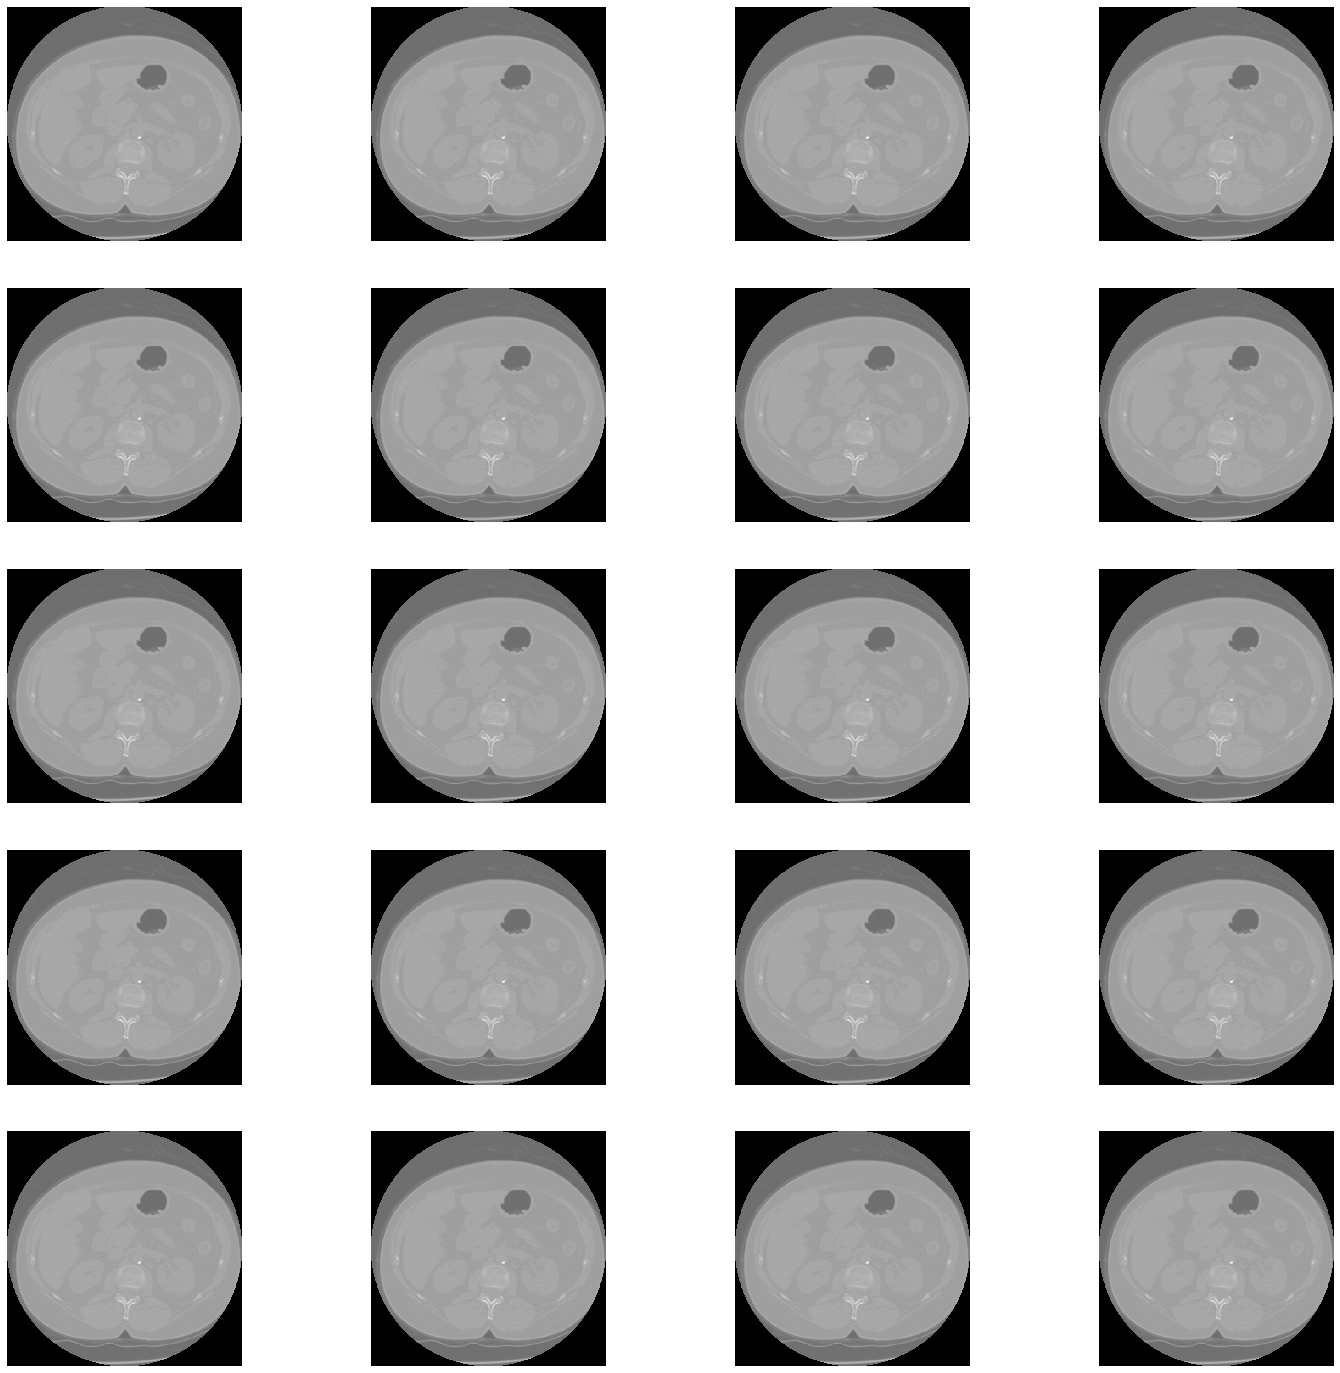

In [28]:
plot_ct_scan(ct_scan)

In [29]:
!mkdir gif

!ls

Data  gif  labels  sample_data


In [30]:
import os
from moviepy.editor import ImageSequenceClip


def gif(filename, array, fps=15, scale=1.0):
    """Creates a gif given a stack of images using moviepy
    Notes
    -----
    works with current Github version of moviepy (not the pip version)
    https://github.com/Zulko/moviepy/commit/d4c9c37bc88261d8ed8b5d9b7c317d13b2cdf62e
    Usage
    -----
    >>> X = randn(100, 64, 64)
    >>> gif('test.gif', X)
    Parameters
    ----------
    filename : string
        The filename of the gif to write to
    array : array_like
        A numpy array that contains a sequence of images
    fps : int
        frames per second (default: 10)
    scale : float
        how much to rescale each image by (default: 1.0)
    """

    # ensure that the file has the .gif extension
    fname, _ = os.path.splitext(filename)
    filename = fname + '.gif'

    # copy into the color dimension if the images are black and white
    if array.ndim == 3:
        array = array[..., np.newaxis] * np.ones(3)

    # make the moviepy clip
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    return clip

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2686976/45929032 bytes (5.9%)6979584/45929032 bytes (15.2%)11247616/45929032 bytes (24.5%)15327232/45929032 bytes (33.4%)19456000/45929032 bytes (42.4%)23781376/45929032 bytes (51.8%)28139520/45929032 bytes (61.3%)32292864/45929032 bytes (70.3%)36610048/45929032 bytes (79.7%)40869888/45929032 bytes (89.0%)45195264/45929032 bytes (98.4%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [31]:
clip = gif('test', ct_scan)


[MoviePy] Building file test.gif with imageio


100%|██████████| 157/157 [00:05<00:00, 28.24it/s]


In [0]:
ls gif/

In [33]:
clip

![test](test.gif "football")

## 3D https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial

In [0]:
import scipy.ndimage

def resample(image, spacing, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    #spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)

    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing

In [35]:
pix_resampled, new_spacing = resample(ct_scan, spacing, [1,1,1])
print("Shape before resampling\t", ct_scan.shape)
print("Shape after resampling\t", pix_resampled.shape)

Shape before resampling	 (157, 512, 512)
Shape after resampling	 (314, 340, 340)


In [0]:
from skimage import measure, morphology
#https://stackoverflow.com/questions/54056565/attributeerror-module-skimage-measure-has-no-attribute-marching-cubes
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
#https://stackoverflow.com/questions/56222259/valueerror-unknown-projection-3d-once-again/56222305
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

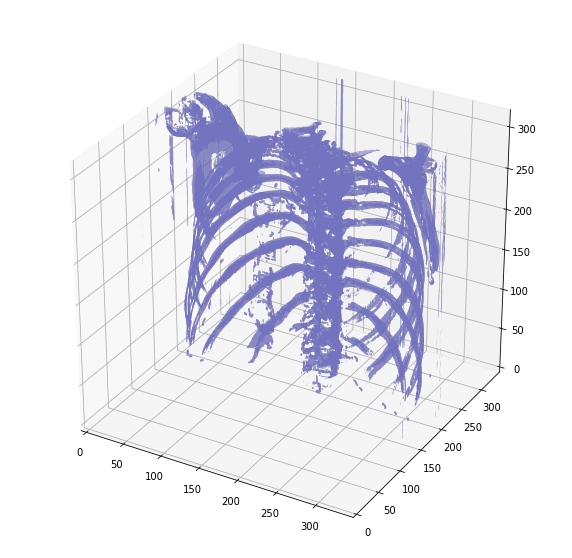

In [37]:
plot_3d(pix_resampled, 400)

## Segmentation of Lungs


https://github.com/booz-allen-hamilton/DSB3Tutorial/blob/master/tutorial_code/LUNA_mask_extraction.py

In [0]:
from __future__ import print_function, division
import SimpleITK as sitk
import numpy as np
import csv
from glob import glob
import pandas as pd
try:
    from tqdm import tqdm # long waits are not fun
except:
    print('TQDM does make much nicer wait bars...')
    tqdm = lambda x: x



In [0]:
#Some helper functions

def make_mask(center,diam,z,width,height,spacing,origin):
    '''
Center : centers of circles px -- list of coordinates x,y,z
diam : diameters of circles px -- diameter
widthXheight : pixel dim of image
spacing = mm/px conversion rate np array x,y,z
origin = x,y,z mm np.array
z = z position of slice in world coordinates mm
    '''
    mask = np.zeros([height,width]) # 0's everywhere except nodule swapping x,y to match img
    #convert to nodule space from world coordinates

    # Defining the voxel range in which the nodule falls
    v_center = (center-origin)/spacing
    v_diam = int(diam/spacing[0]+5)
    v_xmin = np.max([0,int(v_center[0]-v_diam)-5])
    v_xmax = np.min([width-1,int(v_center[0]+v_diam)+5])
    v_ymin = np.max([0,int(v_center[1]-v_diam)-5]) 
    v_ymax = np.min([height-1,int(v_center[1]+v_diam)+5])

    v_xrange = range(v_xmin,v_xmax+1)
    v_yrange = range(v_ymin,v_ymax+1)

    # Convert back to world coordinates for distance calculation
    x_data = [x*spacing[0]+origin[0] for x in range(width)]
    y_data = [x*spacing[1]+origin[1] for x in range(height)]

    # Fill in 1 within sphere around nodule
    for v_x in v_xrange:
        for v_y in v_yrange:
            p_x = spacing[0]*v_x + origin[0]
            p_y = spacing[1]*v_y + origin[1]
            if np.linalg.norm(center-np.array([p_x,p_y,z]))<=diam:
                mask[int((p_y-origin[1])/spacing[1]),int((p_x-origin[0])/spacing[0])] = 1.0
    return(mask)

In [0]:
def matrix2int16(matrix):
    ''' 
matrix must be a numpy array NXN
Returns uint16 version
    '''
    m_min= np.min(matrix)
    m_max= np.max(matrix)
    matrix = matrix-m_min
    return(np.array(np.rint( (matrix-m_min)/float(m_max-m_min) * 65535.0),dtype=np.uint16))

In [0]:
mkdir Output

In [0]:
# Getting list of image files
#luna_path = "/home/jonathan/LUNA2016/"
luna_subset_path = "Data/" # subset0
output_path = "Output/"
labels_path = 'labels/'
file_list=glob(luna_subset_path+"*.mhd")

In [0]:
#####################
#
# Helper function to get rows in data frame associated 
# with each file
def get_filename(file_list, case):
    for f in file_list:
        if case in f:
            return(f)

In [58]:
# The locations of the nodes
df_node = pd.read_csv(labels_path+"annotations.csv")
df_node["file"] = df_node["seriesuid"].map(lambda file_name: get_filename(file_list, file_name))
df_node = df_node.dropna()
df_node

,seriesuid,coordX,coordY,coordZ,diameter_mm,file
23,1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896...,-100.567944,67.260517,-231.816619,6.440879,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1081978...
25,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,46.188539,48.402806,-108.578632,13.596471,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1090025...
26,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,36.392044,76.771663,-123.321911,4.343200,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1090025...
28,1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674...,136.434059,117.765579,-181.947817,4.681382,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1111721...
86,1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048...,145.967465,-161.197634,-312.071347,6.378436,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.1241544...
...,...,...,...,...,...,...
1125,1.3.6.1.4.1.14519.5.2.1.6279.6001.868211851413...,-22.951826,78.571156,-136.901025,6.430802,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.8682118...
1137,1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...,-42.200674,92.207156,-566.589551,4.678130,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.8986425...
1138,1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...,74.399625,112.651026,-534.715881,4.581767,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.8986425...
1141,1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588...,109.116637,48.589511,-120.892058,21.583112,Data/1.3.6.1.4.1.14519.5.2.1.6279.6001.9053719...


In [59]:
#####
#
# Looping over the image files
#
for fcount, img_file in enumerate(tqdm(file_list)):
    mini_df = df_node[df_node["file"]==img_file] #get all nodules associate with file
    if mini_df.shape[0]>0: # some files may not have a nodule--skipping those 
        # load the data once
        itk_img = sitk.ReadImage(img_file) 
        img_array = sitk.GetArrayFromImage(itk_img) # indexes are z,y,x (notice the ordering)
        num_z, height, width = img_array.shape        #heightXwidth constitute the transverse plane
        origin = np.array(itk_img.GetOrigin())      # x,y,z  Origin in world coordinates (mm)
        spacing = np.array(itk_img.GetSpacing())    # spacing of voxels in world coor. (mm)
        # go through all nodes (why just the biggest?)
        for node_idx, cur_row in mini_df.iterrows():       
            node_x = cur_row["coordX"]
            node_y = cur_row["coordY"]
            node_z = cur_row["coordZ"]
            diam = cur_row["diameter_mm"]
            # just keep 3 slices
            imgs = np.ndarray([3,height,width],dtype=np.float32)
            masks = np.ndarray([3,height,width],dtype=np.uint8)
            center = np.array([node_x, node_y, node_z])   # nodule center
            v_center = np.rint((center-origin)/spacing)  # nodule center in voxel space (still x,y,z ordering)
            for i, i_z in enumerate(np.arange(int(v_center[2])-1,
                             int(v_center[2])+2).clip(0, num_z-1)): # clip prevents going out of bounds in Z
                mask = make_mask(center, diam, i_z*spacing[2]+origin[2],
                                 width, height, spacing, origin)
                masks[i] = mask
                imgs[i] = img_array[i_z]
            np.save(os.path.join(output_path,"images_%04d_%04d.npy" % (fcount, node_idx)),imgs)
            np.save(os.path.join(output_path,"masks_%04d_%04d.npy" % (fcount, node_idx)),masks)

100%|██████████| 89/89 [04:24<00:00,  4.52s/it]


image 0


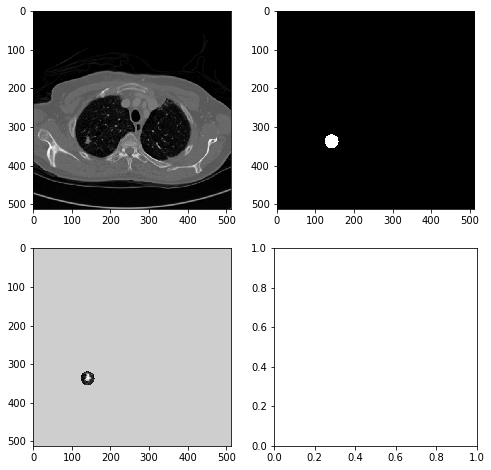

image 1


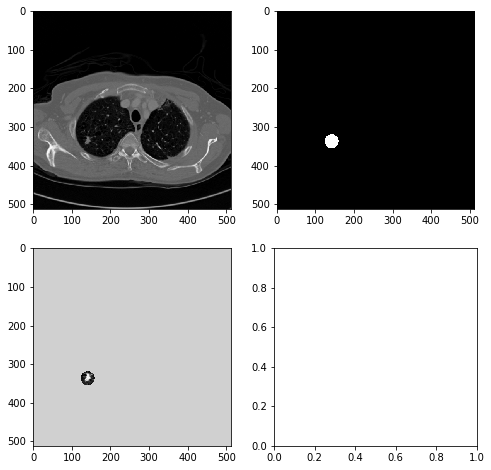

image 2


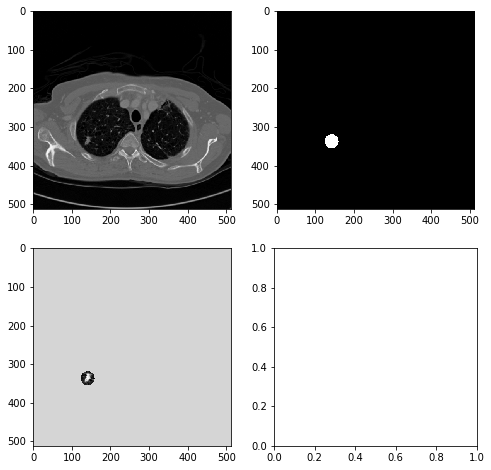

In [67]:
import matplotlib.pyplot as plt

imgs = np.load(output_path+'images_0012_0490.npy')
masks = np.load(output_path+'masks_0012_0490.npy')
for i in range(len(imgs)):
    print("image %d" % i)
    fig,ax = plt.subplots(2,2,figsize=[8,8])
    ax[0,0].imshow(imgs[i],cmap='gray')
    ax[0,1].imshow(masks[i],cmap='gray')
    ax[1,0].imshow(imgs[i]*masks[i],cmap='gray')
    plt.show()
    #raw_input("hit enter to cont : ")

In [70]:
import numpy as np
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize
from glob import glob

working_path = output_path #"/home/jonathan/tutorial/"
file_list=glob(working_path+"images_*.npy")

for img_file in file_list:
    # I ran into an error when using Kmean on np.float16, so I'm using np.float64 here
    imgs_to_process = np.load(img_file).astype(np.float64) 
    print( "on image", img_file)
    for i in range(len(imgs_to_process)):
        img = imgs_to_process[i]
        #Standardize the pixel values
        mean = np.mean(img)
        std = np.std(img)
        img = img-mean
        img = img/std
        # Find the average pixel value near the lungs
        # to renormalize washed out images
        middle = img[100:400,100:400] 
        mean = np.mean(middle)  
        max = np.max(img)
        min = np.min(img)
        # To improve threshold finding, I'm moving the 
        # underflow and overflow on the pixel spectrum
        img[img==max]=mean
        img[img==min]=mean
        #
        # Using Kmeans to separate foreground (radio-opaque tissue)
        # and background (radio transparent tissue ie lungs)
        # Doing this only on the center of the image to avoid 
        # the non-tissue parts of the image as much as possible
        #
        kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
        centers = sorted(kmeans.cluster_centers_.flatten())
        threshold = np.mean(centers)
        thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image
        #
        # I found an initial erosion helful for removing graininess from some of the regions
        # and then large dialation is used to make the lung region 
        # engulf the vessels and incursions into the lung cavity by 
        # radio opaque tissue
        #
        eroded = morphology.erosion(thresh_img,np.ones([4,4]))
        dilation = morphology.dilation(eroded,np.ones([10,10]))
        #
        #  Label each region and obtain the region properties
        #  The background region is removed by removing regions 
        #  with a bbox that is to large in either dimnsion
        #  Also, the lungs are generally far away from the top 
        #  and bottom of the image, so any regions that are too
        #  close to the top and bottom are removed
        #  This does not produce a perfect segmentation of the lungs
        #  from the image, but it is surprisingly good considering its
        #  simplicity. 
        #
        labels = measure.label(dilation)
        label_vals = np.unique(labels)
        regions = measure.regionprops(labels)
        good_labels = []
        for prop in regions:
            B = prop.bbox
            if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472:
                good_labels.append(prop.label)
        mask = np.ndarray([512,512],dtype=np.int8)
        mask[:] = 0
        #
        #  The mask here is the mask for the lungs--not the nodes
        #  After just the lungs are left, we do another large dilation
        #  in order to fill in and out the lung mask 
        #
        for N in good_labels:
            mask = mask + np.where(labels==N,1,0)
        mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation
        imgs_to_process[i] = mask
    np.save(img_file.replace("images","lungmask"),imgs_to_process)
    

on image Output/images_0016_0970.npy
on image Output/images_0003_0023.npy
on image Output/images_0060_0620.npy
on image Output/images_0073_0988.npy
on image Output/images_0044_0344.npy
on image Output/images_0042_0454.npy
on image Output/images_0035_1054.npy
on image Output/images_0049_1072.npy
on image Output/images_0074_0580.npy
on image Output/images_0061_1030.npy
on image Output/images_0021_0507.npy
on image Output/images_0058_0897.npy
on image Output/images_0062_0980.npy
on image Output/images_0068_0129.npy
on image Output/images_0050_0705.npy
on image Output/images_0088_1109.npy
on image Output/images_0037_0935.npy
on image Output/images_0063_1020.npy
on image Output/images_0021_0506.npy
on image Output/images_0083_0144.npy
on image Output/images_0081_0117.npy
on image Output/images_0020_0630.npy
on image Output/images_0046_1016.npy
on image Output/images_0077_1018.npy
on image Output/images_0026_1141.npy
on image Output/images_0010_0839.npy
on image Output/images_0017_1125.npy
o

In [72]:
#
#    Here we're applying the masks and cropping and resizing the image
#


file_list=glob(working_path+"lungmask_*.npy")
out_images = []      #final set of images
out_nodemasks = []   #final set of nodemasks
for fname in file_list:
    print ("working on file ", fname)
    imgs_to_process = np.load(fname.replace("lungmask","images"))
    masks = np.load(fname)
    node_masks = np.load(fname.replace("lungmask","masks"))
    for i in range(len(imgs_to_process)):
        mask = masks[i]
        node_mask = node_masks[i]
        img = imgs_to_process[i]
        new_size = [512,512]   # we're scaling back up to the original size of the image
        img= mask*img          # apply lung mask
        #
        # renormalizing the masked image (in the mask region)
        #
        new_mean = np.mean(img[mask>0])  
        new_std = np.std(img[mask>0])
        #
        #  Pulling the background color up to the lower end
        #  of the pixel range for the lungs
        #
        old_min = np.min(img)       # background color
        img[img==old_min] = new_mean-1.2*new_std   # resetting backgound color
        img = img-new_mean
        img = img/new_std
        #make image bounding box  (min row, min col, max row, max col)
        labels = measure.label(mask)
        regions = measure.regionprops(labels)
        #
        # Finding the global min and max row over all regions
        #
        min_row = 512
        max_row = 0
        min_col = 512
        max_col = 0
        for prop in regions:
            B = prop.bbox
            if min_row > B[0]:
                min_row = B[0]
            if min_col > B[1]:
                min_col = B[1]
            if max_row < B[2]:
                max_row = B[2]
            if max_col < B[3]:
                max_col = B[3]
        width = max_col-min_col
        height = max_row - min_row
        if width > height:
            max_row=min_row+width
        else:
            max_col = min_col+height
        # 
        # cropping the image down to the bounding box for all regions
        # (there's probably an skimage command that can do this in one line)
        # 
        img = img[min_row:max_row,min_col:max_col]
        mask =  mask[min_row:max_row,min_col:max_col]
        if max_row-min_row <5 or max_col-min_col<5:  # skipping all images with no god regions
            pass
        else:
            # moving range to -1 to 1 to accomodate the resize function
            mean = np.mean(img)
            img = img - mean
            min = np.min(img)
            max = np.max(img)
            img = img/(max-min)
            new_img = resize(img,[512,512])
            new_node_mask = resize(node_mask[min_row:max_row,min_col:max_col],[512,512])
            out_images.append(new_img)
            out_nodemasks.append(new_node_mask)

num_images = len(out_images)
#
#  Writing out images and masks as 1 channel arrays for input into network
#
final_images = np.ndarray([num_images,1,512,512],dtype=np.float32)
final_masks = np.ndarray([num_images,1,512,512],dtype=np.float32)
for i in range(num_images):
    final_images[i,0] = out_images[i]
    final_masks[i,0] = out_nodemasks[i]

rand_i = np.random.choice(range(num_images),size=num_images,replace=False)
test_i = int(0.2*num_images)
np.save(working_path+"trainImages.npy",final_images[rand_i[test_i:]])
np.save(working_path+"trainMasks.npy",final_masks[rand_i[test_i:]])
np.save(working_path+"testImages.npy",final_images[rand_i[:test_i]])
np.save(working_path+"testMasks.npy",final_masks[rand_i[:test_i]])

working on file  Output/lungmask_0083_0144.npy
working on file  Output/lungmask_0068_0132.npy
working on file  Output/lungmask_0081_0117.npy
working on file  Output/lungmask_0023_0790.npy
working on file  Output/lungmask_0060_0622.npy
working on file  Output/lungmask_0017_1123.npy
working on file  Output/lungmask_0042_0454.npy
working on file  Output/lungmask_0023_0789.npy
working on file  Output/lungmask_0014_0139.npy
working on file  Output/lungmask_0042_0455.npy
working on file  Output/lungmask_0064_1106.npy
working on file  Output/lungmask_0072_0796.npy
working on file  Output/lungmask_0050_0705.npy
working on file  Output/lungmask_0078_0026.npy
working on file  Output/lungmask_0041_0748.npy
working on file  Output/lungmask_0052_0939.npy
working on file  Output/lungmask_0061_1030.npy
working on file  Output/lungmask_0072_0798.npy
working on file  Output/lungmask_0010_0838.npy
working on file  Output/lungmask_0026_1141.npy
working on file  Output/lungmask_0053_0871.npy
working on fi

image 0


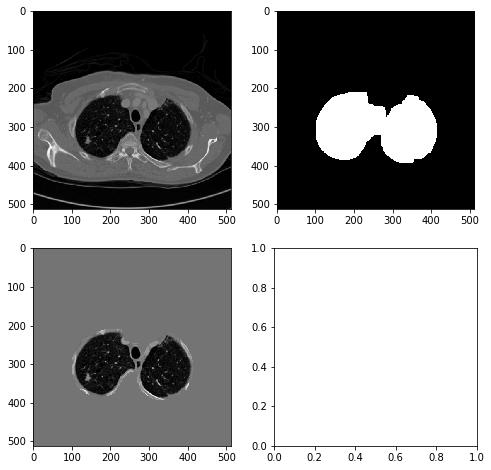

image 1


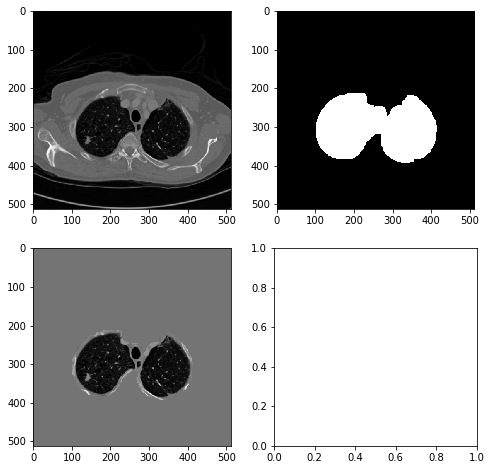

image 2


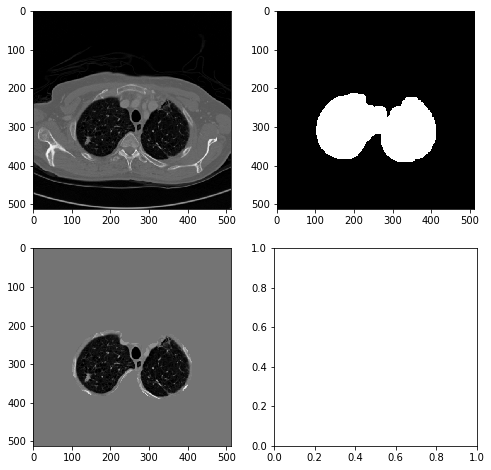

In [76]:
imgs = np.load(working_path + 'images_0012_0490.npy')
lungmask = np.load(working_path+'lungmask_0012_0490.npy')

for i in range(len(imgs)):
    print ("image %d" % i)
    fig,ax = plt.subplots(2,2,figsize=[8,8])
    ax[0,0].imshow(imgs[i],cmap='gray')
    ax[0,1].imshow(lungmask[i],cmap='gray')
    ax[1,0].imshow(imgs[i]*lungmask[i],cmap='gray')
    plt.show()
    #raw_input("hit enter to cont : ")

## Dice Ceofficient Cost function for Segmentation

In [0]:
from __future__ import print_function

import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Dropout, concatenate
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K

working_path = output_path

#K.image_data_format()  # Theano dimension ordering in this code
K.common.set_image_dim_ordering('th')

img_rows = 512
img_cols = 512

smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_np(y_true,y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

## UNET for Candidate Point Generation

In [0]:
def get_unet():
    inputs = Input((1,img_rows, img_cols))
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv1)

    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool2)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(pool3)
    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same')(pool4)
    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=1)
    #up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(up6)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=1)
    #up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(up7)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=1)
    #up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up8)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv8)
    
    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=1)
    #up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up9)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)

    model.compile(optimizer=Adam(lr=1.0e-5), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [0]:
def train_and_predict(use_existing):
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train = np.load(working_path+"trainImages.npy").astype(np.float32)
    imgs_mask_train = np.load(working_path+"trainMasks.npy").astype(np.float32)

    imgs_test = np.load(working_path+"testImages.npy").astype(np.float32)
    imgs_mask_test_true = np.load(working_path+"testMasks.npy").astype(np.float32)
    
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean  # images should already be standardized, but just in case
    imgs_train /= std

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    # Saving weights to unet.hdf5 at checkpoints
    model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss', save_best_only=True)
    #
    # Should we load existing weights? 
    # Set argument for call to train_and_predict to true at end of script
    if use_existing:
        model.load_weights('./unet.hdf5')
        
    # 
    # The final results for this tutorial were produced using a multi-GPU
    # machine using TitanX's.
    # For a home GPU computation benchmark, on my home set up with a GTX970 
    # I was able to run 20 epochs with a training set size of 320 and 
    # batch size of 2 in about an hour. I started getting reseasonable masks 
    # after about 3 hours of training. 
    #
    print('-'*30)
    print('Fitting model...')
    print('-'*30)
    model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=20, verbose=1, shuffle=True,
              callbacks=[model_checkpoint])

    # loading best weights from training session
    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    model.load_weights('./unet.hdf5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    num_test = len(imgs_test)
    imgs_mask_test = np.ndarray([num_test,1,512,512],dtype=np.float32)
    for i in range(num_test):
        imgs_mask_test[i] = model.predict([imgs_test[i:i+1]], verbose=0)[0]
    np.save('masksTestPredicted.npy', imgs_mask_test)
    mean = 0.0
    a = imgs_mask_test
    for i in range(num_test):
        mean+=dice_coef_np(imgs_mask_test_true[i,0], imgs_mask_test[i,0])
    mean/=num_test
    print("Mean Dice Coeff : ",mean)
    return a


In [274]:
a = train_and_predict(False)

------------------------------
Loading and preprocessing train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------
Epoch 1/20
269/269 [==============================] - 15s 54ms/step - loss: -3.7700e-05 - dice_coef: 3.7700e-05
Epoch 2/20
269/269 [==============================] - 13s 48ms/step - loss: -3.8649e-05 - dice_coef: 3.8649e-05
Epoch 3/20
269/269 [==============================] - 13s 48ms/step - loss: -4.0102e-05 - dice_coef: 4.0102e-05
Epoch 4/20
269/269 [==============================] - 13s 48ms/step - loss: -4.2671e-05 - dice_coef: 4.2671e-05
Epoch 5/20
269/269 [==============================] - 13s 48ms/step - loss: -5.0276e-05 - dice_coef: 5.0276e-05
Epoch 6/20
269/269 [==============================] - 13s 48ms/step - loss: -7.2599e-05 - dice_coef: 7.2599e-05
Epoch 7/20
269/269 [==============================] -

In [257]:
imgs_testlllll = np.load(working_path+"testImages.npy").astype(np.float32)
imgs_testlllll.shape

(67, 1, 512, 512)

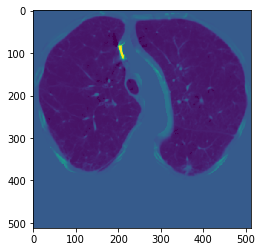

In [258]:
plt.imshow(imgs_testlllll[0][0])

In [259]:
imgs_mask_test_true11111 = np.load(working_path+"testMasks.npy").astype(np.float32)
imgs_mask_test_true11111[0][0][30][:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
#np.save('test.npy',imgs_mask_test_true11111[0][0])

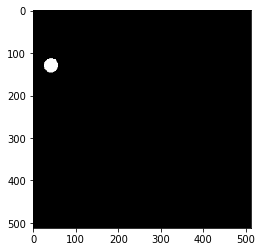

In [260]:
plt.imshow(imgs_mask_test_true11111[1][0], cmap='gray')

In [0]:
new_modelll = get_unet()
new_modelll.load_weights("./unet.hdf5")

In [0]:
testtt = new_modelll.predict(imgs_mask_test_true11111[1:2])

In [267]:
arrrr = np.load("masksTestPredicted.npy").astype(np.float32)
arrrr.shape

(67, 1, 512, 512)

In [277]:
np.where(a[0][0] > 0)

(array([  0,   0, 511, 511]), array([  0, 511,   0, 511]))

In [272]:
arrrr[0][0][511][:]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [242]:
imgs_mask_test_true11111[1][0][370][370]

0.0

In [243]:
np.where(imgs_mask_test_true11111[1][0]>0)

(array([112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 113, 113,
        113, 113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114,
        114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114,
        114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
        115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116,
        116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116,
        116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117,
        117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117,
        117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118,
        118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118,
        118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119,
        119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119,
        119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120,
        120, 120, 120, 120, 120, 120, 120, 120, 120

In [270]:
np.where(arrrr[0][0] > 0.0 )

(array([  0, 511]), array([  0, 511]))

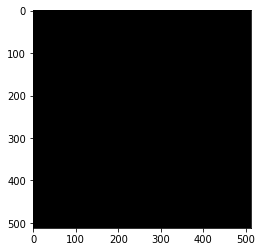

In [265]:
plt.imshow(arrrr[0][0],cmap='gray')

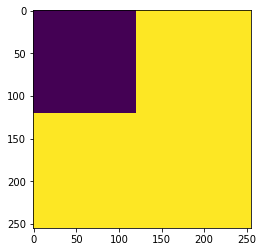

In [234]:
ar = np.ones((255,255))*0.016
ar[:120,:120] = ar[:120,:120] * 0
plt.imshow(ar)

In [175]:
imgs_mask_test_true11111[0][0].max()

0.003921569

In [181]:
(arrrr[0][0]*1000000).max()

25.987625122070312

In [0]:
def plot_33d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
   # p = p[:,:,::-1]
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

## Conclusion

**Still not predict and load the segmentation image because the predictions return all 0**

**Didn't train with CNN to predict cancer patient**

In [0]:
m

In [0]:
m